## Questions to explore

 * What years were best for funding?
 * What months are typically best to raise funding?
 * How important is affiliation with a top 20 VC fund in determining future funding?
 * What universities affect funding?
 * What degrees are best for funding?
 * What location is best for funding?
 * When to found? (beware January effect)
 * What age?
 * What category/industry?
 * pull in data from twitter using twitter username?

In [1]:
# load libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
import numpy as np
import matplotlib.dates as dates
import datetime

%matplotlib inline 

# styling
plt.style.use('fivethirtyeight')

In [2]:
# load funding rounds data 
temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_funding_rounds.csv'
cb_funding_rounds = pd.read_csv(temp_path)

In [3]:
# load objects data 
temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_objects.csv'
cb_objects = pd.read_csv(temp_path)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cb_objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [5]:
cb_funding_rounds.head(3)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,NaN,...,NaN,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,NaN,...,NaN,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,NaN,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23


Alright, so we have a wealth of data in the above table. 
The columns we'll largely use for modelling and plotting will be the following: 
 * funding_round_type
 * raised_amount_usd
 * funded_at
 * participants
 
These two columns could also be useful:
 * premoney_valuation_usd
 * postmoney_valuation_usd
 
Let's try plotting some of this data.  
We'll start with jut plotting all the daily funding activity over the last few years.  

In [6]:
cb_funding_rounds.funded_at = pd.to_datetime(cb_funding_rounds.funded_at)

a = cb_funding_rounds
a = a[a.funding_round_type != 'post-ipo'] # remove post ipo rounds
a = a[a.funding_round_type != 'other'] # remove other (debt, grants) rounds
a = a[a.funding_round_type != 'private-equity'] # remove private-equity rounds 

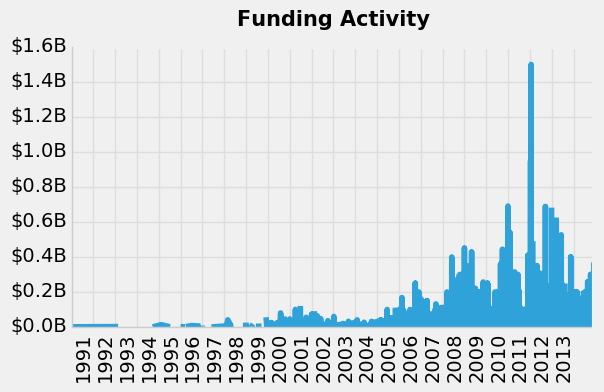

In [7]:
b = a[a.funded_at.dt.year >= 1990]

ax = b.plot(x = 'funded_at', y = 'raised_amount_usd', rot = 90)

def pct(x,pos): return "${}B".format((x/1000000000))
ax.yaxis.set_major_formatter(plt.FuncFormatter(pct))
#ax.set_ylim([0,2000000000])

#ax.patch.set_facecolor('#FFFFFF')
ax.grid(b = True, which = 'major', color = '#DDDDDD', linestyle = '-')
ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Funding Activity", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')
import matplotlib.dates as dates

ax.xaxis.set_major_locator(dates.YearLocator())

We can see a few things from the above graph. 
* Funding activity has been increasing over time. 
* Funding activity can be characterised as having boom years and bust years. 
* Notwithstanding the above, funding activity appears to be lumpy. 

Let's take a quick look at how big the average funding round was in each year. 

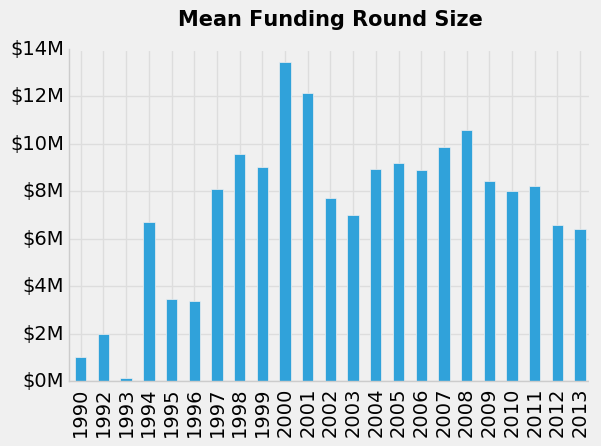

In [8]:
b = a[a.funded_at.dt.year >= 1990]
b = b.groupby(by = [b.funded_at.dt.year]).mean().reset_index()

ax = b.plot(x = 'funded_at', y = 'raised_amount_usd', rot = 90, kind = 'bar')

def pct(x,pos): return "${}M".format(int(x/1000000))
ax.yaxis.set_major_formatter(plt.FuncFormatter(pct))
#ax.set_ylim([0,2000000000])

#ax.patch.set_facecolor('#FFFFFF')
ax.grid(b = True, which = 'major', color = '#DDDDDD', linestyle = '-')
ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Mean Funding Round Size", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

#import matplotlib.dates as dates
#ax.xaxis.set_major_locator(dates.MonthLocator())

We can see the dotcom bubble quite clearly here.  
Average funding peaked around the year 2000 and has not come anywhere close since. 

Now let's take a look at daily Funding activity for the last 3 years, the last year we have data upon. 

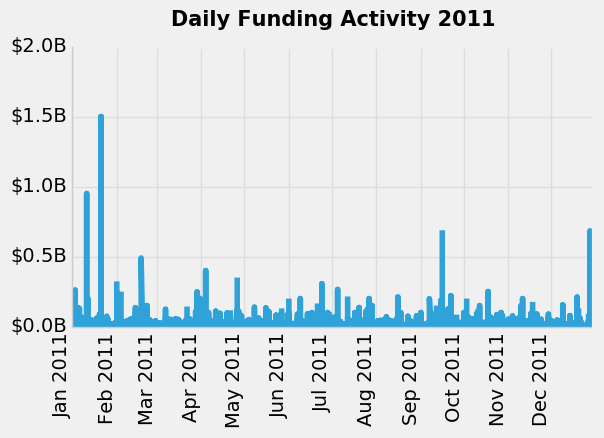

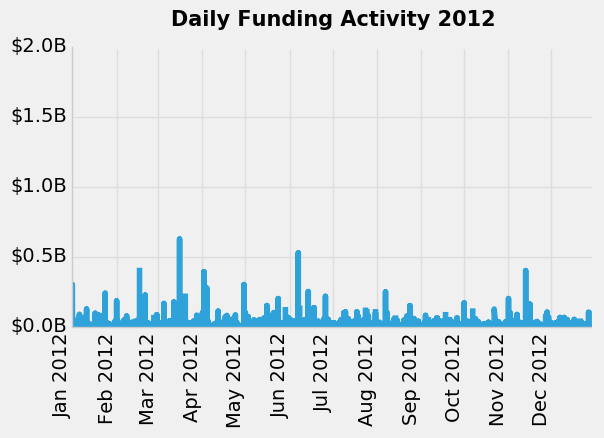

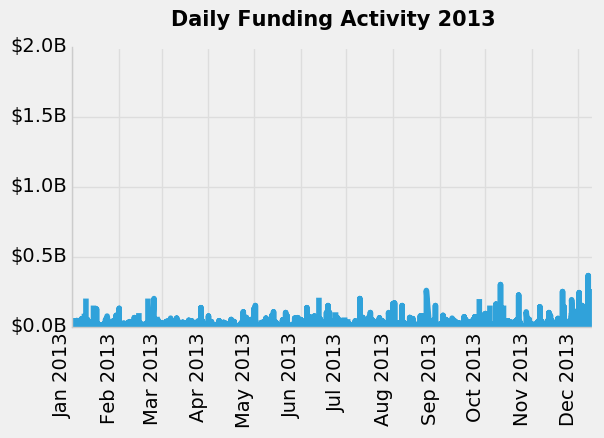

In [9]:
b = a[a.funded_at.dt.year >= 2011]

for group in range(2011,2014):
    
    c = b[b.funded_at.dt.year == group]
    
    ax = c.plot(x = 'funded_at', y = 'raised_amount_usd', rot = 90)

    def pct(x,pos): return "${}B".format((x/1000000000))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(pct))
    ax.set_ylim([0,2000000000])

    #ax.patch.set_facecolor('#FFFFFF')
    ax.grid(b = True, which = 'major', color = '#DDDDDD', linestyle = '-')
    ax.legend().set_visible(False)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['left'].set_linewidth(1)

    ax.set_title("Daily Funding Activity " + str(group), fontweight = 'bold', fontsize = 15, position = [.5,1.05])
    ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
    ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

    #import matplotlib.dates as dates
    ax.xaxis.set_major_locator(dates.MonthLocator())

We see there are some days where absolutely massive amounts of capital were deployed but other than that, nothing particularly insightful here.  

Next, let's look at mean funding for each month.  

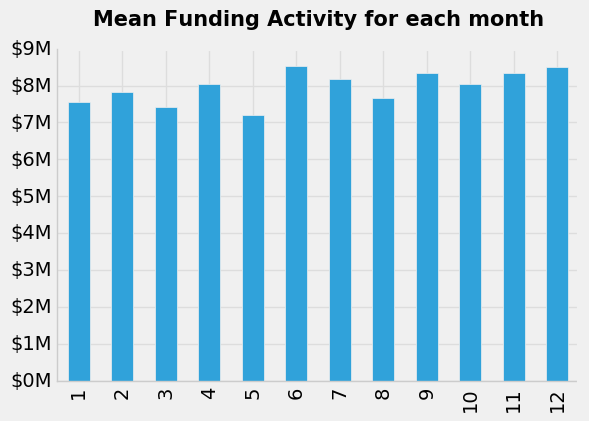

In [10]:
b = a[a.funded_at.dt.year >= 1990]
b = b.groupby(by = [b.funded_at.dt.month]).mean().reset_index()

ax = b.plot(x = 'funded_at', y = 'raised_amount_usd', rot = 90, kind = 'bar')

def pct(x,pos): return "${}M".format(int(x/1000000))
ax.yaxis.set_major_formatter(plt.FuncFormatter(pct))
#ax.set_ylim([0,2000000000])

#ax.patch.set_facecolor('#FFFFFF')
ax.grid(b = True, which = 'major', color = '#DDDDDD', linestyle = '-')
ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Mean Funding Activity for each month", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

#import matplotlib.dates as dates
#ax.xaxis.set_major_locator(dates.MonthLocator())

Not much variation between the different months.  
That's quite interesting.  
One might assume that there would be less activity in the latter part of the year but this clearly doesn't appear to be the case. Good to know. 

Alright, one thing you hear a lot about is how series A is the new series B and the series B is the new series C.   
Let's try to see if this is actually true for most ventures by looking at median size of each round in each year.  

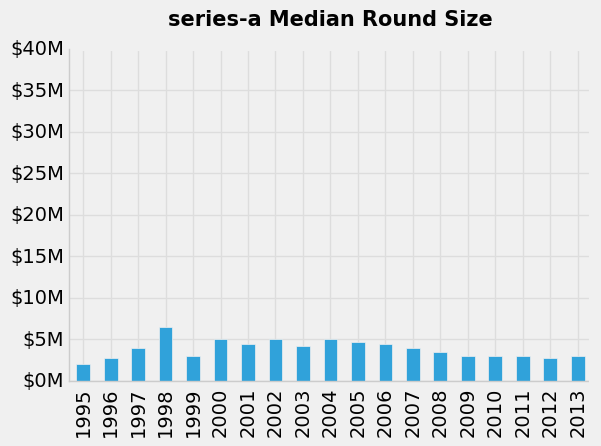

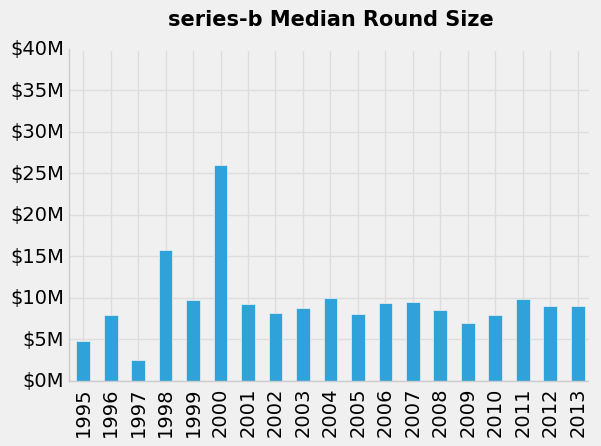

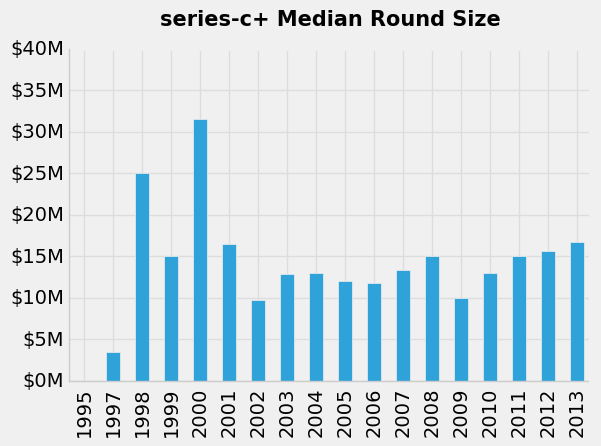

In [11]:
b = a[a.funded_at.dt.year >= 1990]
b = b[b.funding_round_type.isin(['series-a', 'series-b', 'series-c+'])]
b = b.groupby(by = [b.funded_at.dt.year, b.funding_round_type])['raised_amount_usd'].median().reset_index()

for group in b.funding_round_type.unique():
    
    c = b[b.funding_round_type == group]

    ax = c.plot(x = 'funded_at', y = 'raised_amount_usd', rot = 90, kind = 'bar')

    def pct(x,pos): return "${}M".format(int(x/1000000))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(pct))
    ax.set_ylim([0,40000000])

    #ax.patch.set_facecolor('#FFFFFF')
    ax.grid(b = True, which = 'major', color = '#DDDDDD', linestyle = '-')
    ax.legend().set_visible(False)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['left'].set_linewidth(1)

    ax.set_title(group + " Median Round Size", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
    ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
    ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

    #import matplotlib.dates as dates
    #ax.xaxis.set_major_locator(dates.MonthLocator())

We can see series B and series C haven't changed much over the years.  
Series A on the other hand seems to be becoming smaller and smaller.  
This makes sense if you consider that many of the activities that early stage startups typically do (e.g. prototyping) has become considerably cheaper over time.  

Let's see what some of the biggest raises in each year were and if there are any familiar names. 

In [21]:
b = a[a.funded_at.dt.year >= 1990]
b = b.loc[b.groupby(by = [b.funded_at.dt.year])['raised_amount_usd'].idxmax()]
b = pd.merge(b, cb_objects, how='left', on=['id'])

b.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by_y,created_at_y,updated_at_y
0,4072,4072,c:14957,1990-01-17,venture,unattributed,1000000.0,1000000.0,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30856,30856,c:151866,1992-02-22,venture,unattributed,2000000.0,2000000.0,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2826,2826,c:7675,1993-09-23,angel,seed,125000.0,125000.0,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30857,30857,c:151866,1994-02-12,venture,unattributed,13000000.0,13000000.0,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24535,24535,c:317,1995-07-01,series-a,a,8000000.0,8000000.0,USD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


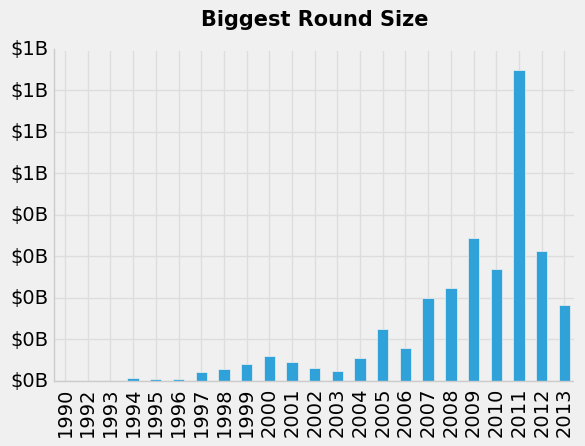

In [13]:
b = a[a.funded_at.dt.year >= 1990]
c = b.groupby(by = [b.funded_at.dt.year])['raised_amount_usd'].max().reset_index()

ax = c.plot(x = 'funded_at', y = 'raised_amount_usd', rot = 90, kind = 'bar')

def pct(x,pos): return "${}B".format(int(x/1000000000))
ax.yaxis.set_major_formatter(plt.FuncFormatter(pct))
#ax.set_ylim([0,2000000000])

#ax.patch.set_facecolor('#FFFFFF')
ax.grid(b = True, which = 'major', color = '#DDDDDD', linestyle = '-')
ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Biggest Round Size", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

#import matplotlib.dates as dates
#ax.xaxis.set_major_locator(dates.MonthLocator())

The general trend is that each year there's a bigger round than the previous biggest.  
With companies like Uber, Airbnb, Snap planning IPOs, we can expect to continue seeing this trend (at least until the next crash. 

In [14]:
#!/usr/bin/python
import MySQLdb

db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="Nerfguns21",  # your password
                     db="CB")        # name of the data base

# you must create a Cursor object. It will let
#  you execute all the queries you need
cur = db.cursor()

# Use all the SQL you like
cur.execute("SELECT * FROM CB.cb_ipos")

# print all the first cell of all the rows
for row in cur.fetchall():
    print (row[0])

db.close()

ImportError: No module named 'MySQLdb'